In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
file_name = '1_robot_in_line'
df = pd.read_csv(f'data/{file_name}.csv', skiprows=3)
df

,frame,time,robot_id,x,y,velocity_x,velocity_y,speed,has_collided
0,0,0.000000,0,0,-0.000000,0,0.000000,0.000000,-1
1,1,0.033333,0,0,-0.003644,0,-0.109333,0.109333,-1
2,2,0.066667,0,0,-0.010933,0,-0.218667,0.218667,-1
3,3,0.100000,0,0,-0.021867,0,-0.328000,0.328000,-1
4,4,0.133333,0,0,-0.036444,0,-0.437333,0.437333,-1
...,...,...,...,...,...,...,...,...,...
296,296,9.866680,0,0,-6.113850,0,0.563957,0.563957,-1
297,297,9.900020,0,0,-6.091410,0,0.673290,0.673290,-1
298,298,9.933350,0,0,-6.065320,0,0.782622,0.782622,-1
299,299,9.966690,0,0,-6.035590,0,0.891955,0.891955,-1


In [18]:
num_robots = df['robot_id'].max() + 1
max_time = df['time'].max()
max_speed = df['speed'].max()

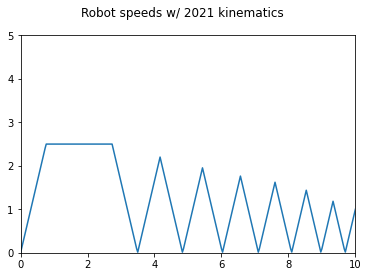

In [19]:
fig = plt.figure()

if num_robots > 1:
    fig, axs = plt.subplots(num_robots, sharex=True, sharey=True)
    fig.suptitle('Robot speeds w/ 2021 kinematics')

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    for robot_id, ax in enumerate(axs):
        ax.set_ylim([0, max_speed])
        robot = df[df['robot_id'] == robot_id]
        speed = robot['speed']
        ax.plot(time, speed)
else:
    fig.suptitle('Robot speeds w/ 2021 kinematics')
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, max_time), 
                                                  ylim=(0, max_speed * 1.25))

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    
    ax.set_ylim([0, 5])
    robot = df
    speed = robot['speed']
    ax.plot(time, speed)


# Save plot
fig.savefig('plot/vel_w_kinematics.jpg', dpi=200)